In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import warnings
import plotly.graph_objects as go
import plotly.express as px
import colorsys
warnings.filterwarnings("ignore")

# Data import

In [2]:
df_beauty_clients = pd.read_csv("ecommerce_beauty/01_clients.csv", sep=';')
df_beauty_orders = pd.read_csv("ecommerce_beauty/02_orders.csv", sep=';')
df_beauty_products = pd.read_csv("ecommerce_beauty/03_products.csv", sep=';')

In [3]:
df_beauty_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15983 entries, 0 to 15982
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userId    15983 non-null  object
 1   userName  15983 non-null  object
 2   email     15983 non-null  object
 3   city      15983 non-null  object
 4   birthday  15983 non-null  object
 5   gender    15983 non-null  object
dtypes: object(6)
memory usage: 749.3+ KB


In [4]:
df_beauty_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323966 entries, 0 to 323965
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          323966 non-null  object 
 1   orderId       323966 non-null  object 
 2   sourceMedium  323966 non-null  object 
 3   user          323966 non-null  object 
 4   sku           323966 non-null  object 
 5   quantity      323966 non-null  int64  
 6   price         323966 non-null  float64
 7   revenue       323966 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 19.8+ MB


In [5]:
df_beauty_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sku            129 non-null    object 
 1   main_category  129 non-null    object 
 2   sub_category   129 non-null    object 
 3   product_name   129 non-null    object 
 4   price          129 non-null    float64
dtypes: float64(1), object(4)
memory usage: 5.2+ KB


In [6]:
df_beauty_clients.head()

,userId,userName,email,city,birthday,gender
0,USR00000001,Laura,hzRyUBRd@hotmail.com,Aosta,25/10/1988,F
1,USR00000002,Giulia,UE6i8bBO@gmail.com,Milano,12/02/1988,F
2,USR00000003,Giulia,QxRvmwH4@virgilio.it,Bolzano,17/09/1985,F
3,USR00000004,Andrea,3D3nd2Dw@yahoo.com,Perugia,02/01/1986,M
4,USR00000005,Francesca,cGpyYiLr@libero.it,Roma,19/05/1989,F


In [7]:
df_beauty_orders.head()

,date,orderId,sourceMedium,user,sku,quantity,price,revenue
0,2021-01-01,ORD0000001,google / cpc,USR00002080,MKP023,1,12.99,12.99
1,2021-01-01,ORD0000001,google / cpc,USR00002080,CRP030,1,26.99,26.99
2,2021-01-01,ORD0000001,google / cpc,USR00002080,SKN005,1,25.99,25.99
3,2021-01-01,ORD0000002,(direct) / (none),Anonimo,SKN017,1,27.99,27.99
4,2021-01-01,ORD0000002,(direct) / (none),Anonimo,CRP029,2,24.99,49.98


In [8]:
df_beauty_products.head()

,sku,main_category,sub_category,product_name,price
0,SKN001,Skincare,Creme Viso,Crema Idratante Quotidiana,29.99
1,SKN002,Skincare,Creme Viso,Crema Anti-Rossore,34.99
2,SKN003,Skincare,Creme Viso,Crema Anti-Inquinamento,30.99
3,SKN004,Skincare,Creme Viso,Crema Rigenerante Notte,37.99
4,SKN005,Skincare,Creme Viso,Crema Illuminante,25.99


# Merge the tables

In [9]:
df_beauty = pd.merge(df_beauty_clients, df_beauty_orders, left_on='userId', right_on='user').drop('user', axis=1)

In [10]:
df_beauty = pd.merge(df_beauty, df_beauty_products, on='sku')

In [11]:
df_beauty.head()

,userId,userName,email,city,birthday,gender,date,orderId,sourceMedium,sku,quantity,price_x,revenue,main_category,sub_category,product_name,price_y
0,USR00000001,Laura,hzRyUBRd@hotmail.com,Aosta,25/10/1988,F,2021-06-06,ORD0020852,(direct) / (none),CRP028,1,22.99,22.99,Corpo,Anticellulite,Crema Anticellulite Rassodante,22.99
1,USR00000002,Giulia,UE6i8bBO@gmail.com,Milano,12/02/1988,F,2021-05-08,ORD0017194,(direct) / (none),CRP028,1,22.99,22.99,Corpo,Anticellulite,Crema Anticellulite Rassodante,22.99
2,USR00000003,Giulia,QxRvmwH4@virgilio.it,Bolzano,17/09/1985,F,2022-01-13,ORD0053637,(direct) / (none),CRP028,1,22.99,22.99,Corpo,Anticellulite,Crema Anticellulite Rassodante,22.99
3,USR00000003,Giulia,QxRvmwH4@virgilio.it,Bolzano,17/09/1985,F,2023-03-08,ORD0114121,google / cpc,CRP028,2,22.99,45.98,Corpo,Anticellulite,Crema Anticellulite Rassodante,22.99
4,USR00000004,Andrea,3D3nd2Dw@yahoo.com,Perugia,02/01/1986,M,2021-03-03,ORD0008425,dem / email,CRP028,1,22.99,22.99,Corpo,Anticellulite,Crema Anticellulite Rassodante,22.99


In [12]:
df_beauty[df_beauty['price_x'] != df_beauty['price_y']]

,userId,userName,email,city,birthday,gender,date,orderId,sourceMedium,sku,quantity,price_x,revenue,main_category,sub_category,product_name,price_y


Price x and Price y are always the same, so we can just take one of them as price

In [13]:
df_beauty.drop('price_x', axis=1, inplace=True)
df_beauty.rename(columns={'price_y': 'price'}, inplace=True)

In [14]:
df_beauty.head()

,userId,userName,email,city,birthday,gender,date,orderId,sourceMedium,sku,quantity,revenue,main_category,sub_category,product_name,price
0,USR00000001,Laura,hzRyUBRd@hotmail.com,Aosta,25/10/1988,F,2021-06-06,ORD0020852,(direct) / (none),CRP028,1,22.99,Corpo,Anticellulite,Crema Anticellulite Rassodante,22.99
1,USR00000002,Giulia,UE6i8bBO@gmail.com,Milano,12/02/1988,F,2021-05-08,ORD0017194,(direct) / (none),CRP028,1,22.99,Corpo,Anticellulite,Crema Anticellulite Rassodante,22.99
2,USR00000003,Giulia,QxRvmwH4@virgilio.it,Bolzano,17/09/1985,F,2022-01-13,ORD0053637,(direct) / (none),CRP028,1,22.99,Corpo,Anticellulite,Crema Anticellulite Rassodante,22.99
3,USR00000003,Giulia,QxRvmwH4@virgilio.it,Bolzano,17/09/1985,F,2023-03-08,ORD0114121,google / cpc,CRP028,2,45.98,Corpo,Anticellulite,Crema Anticellulite Rassodante,22.99
4,USR00000004,Andrea,3D3nd2Dw@yahoo.com,Perugia,02/01/1986,M,2021-03-03,ORD0008425,dem / email,CRP028,1,22.99,Corpo,Anticellulite,Crema Anticellulite Rassodante,22.99


# Average Revenue per User (ARPU) 
ARPU is the average revenue generated per user in a given time period. It is calculated by dividing the total revenue by the number of users.

In [15]:
# ARPU
df_beauty.groupby('userId')['revenue'].sum().mean()

440.9207322438718

In [16]:
my_palette = ['#A7C7E7', '#ffbcda', '#9FE2BF', '#C4B454', '#F89880', '#ffff33', '#a65628', '#f781bf', '#999999'] # Custom list of hex colors

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=my_palette)

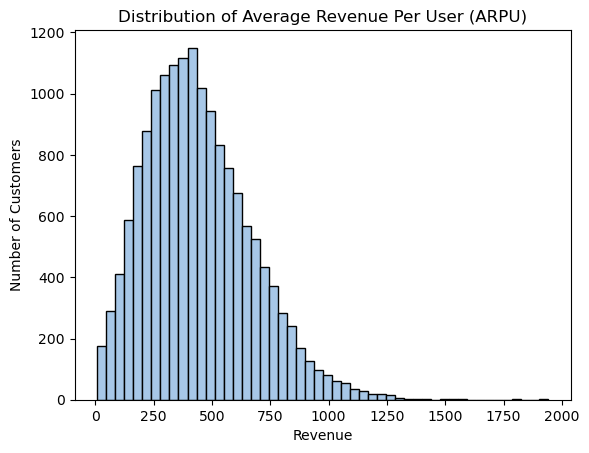

In [17]:
# plot ARPU
df_beauty.groupby('userId')['revenue'].sum().plot(kind='hist', bins=50, edgecolor='black')
plt.title('Distribution of Average Revenue Per User (ARPU)')
plt.xlabel('Revenue')
plt.ylabel('Number of Customers')
plt.show()

# Average Order Value (AOV)
AOV is the average amount spent by a customer in a single transaction. 

In [18]:
# AOV
df_beauty['revenue'].mean()

36.764383866758216

Text(0, 0.5, 'Frequency')

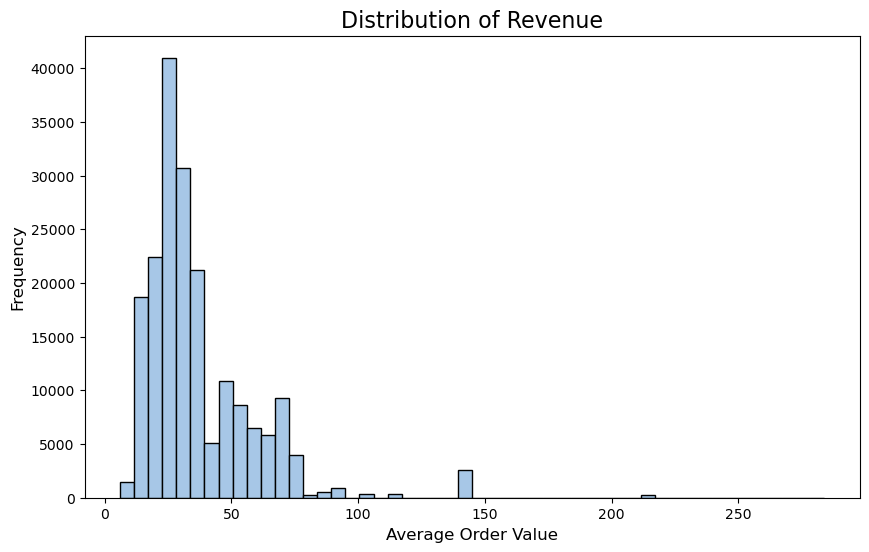

In [19]:
plt.figure(figsize=(10, 6))
df_beauty['revenue'].plot(kind='hist', bins=50, edgecolor='black')
plt.title('Distribution of Revenue', fontsize=16)
plt.xlabel('Average Order Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Source/Medium analysis

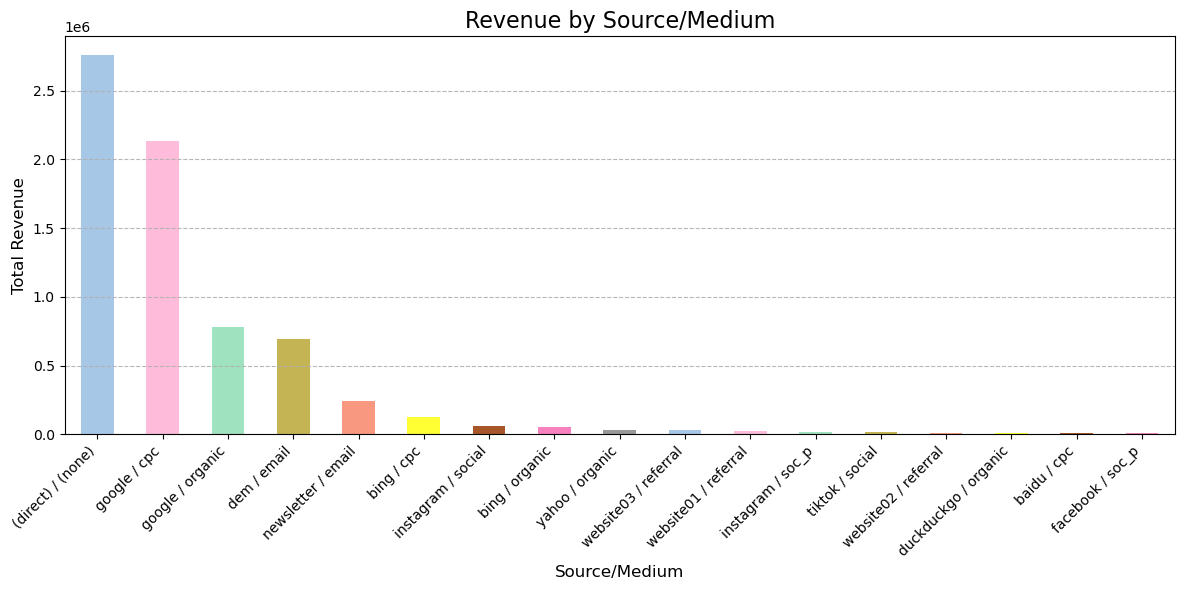

In [20]:
revenue_by_source = df_beauty.groupby('sourceMedium')['revenue'].sum().sort_values(ascending=False) # Group by sourceMedium and sum revenue

plt.figure(figsize=(12, 6))
revenue_by_source.plot(kind='bar', color=my_palette)

plt.title('Revenue by Source/Medium', fontsize=16)
plt.xlabel('Source/Medium', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()

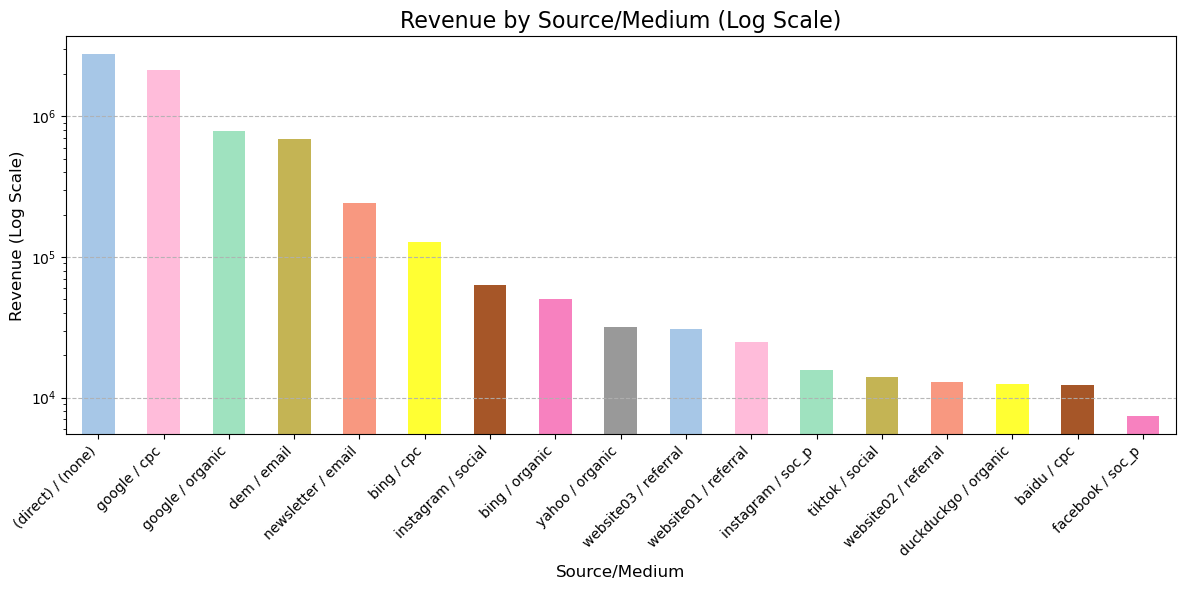

In [21]:
# same but with log scale
revenue_by_source = df_beauty.groupby('sourceMedium')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
revenue_by_source.plot(kind='bar', logy=True, color=my_palette)

plt.title('Revenue by Source/Medium (Log Scale)', fontsize=16)
plt.xlabel('Source/Medium', fontsize=12)
plt.ylabel('Revenue (Log Scale)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.9)

plt.show()

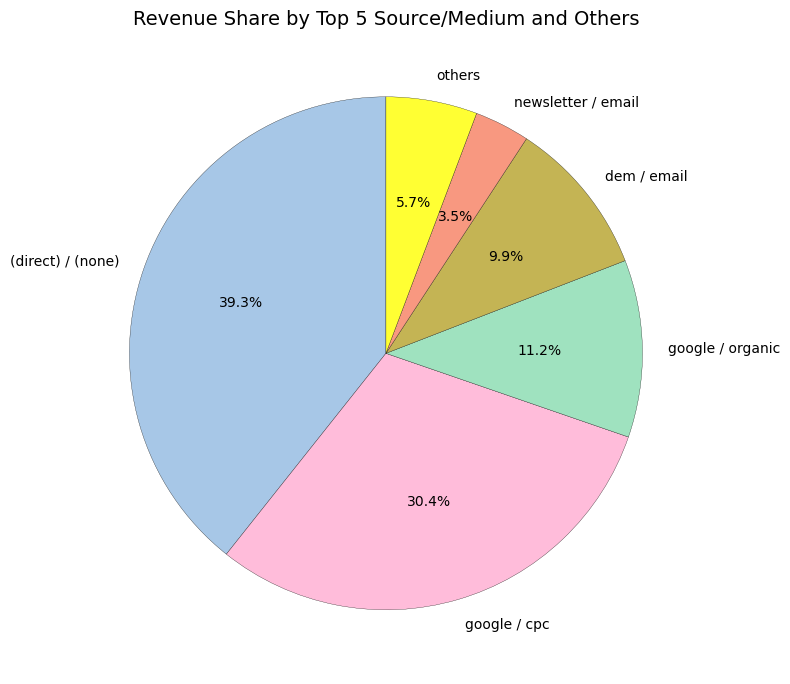

In [22]:
# pie plot with first 5 sourceMedium and then 'others'
perc = df_beauty.groupby('sourceMedium')['revenue'].sum() / df_beauty['revenue'].sum()
perc = perc.sort_values(ascending=False)
perc = pd.concat([perc[:5], pd.Series(1 - perc[:5].sum(), index=['others'])])

plt.figure(figsize=(8,8))
perc.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=my_palette,wedgeprops={'edgecolor': 'black','linewidth': 0.2})

plt.title('Revenue Share by Top 5 Source/Medium and Others', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

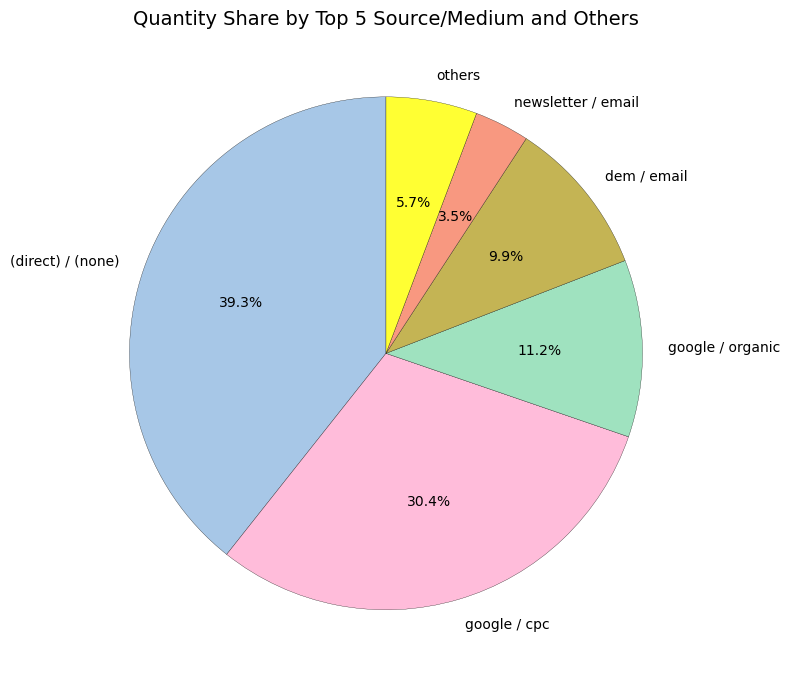

In [23]:
# pie plot with first 5 sourceMedium and then 'others'
perc = df_beauty.groupby('sourceMedium')['quantity'].sum() / df_beauty['quantity'].sum()
perc = perc.sort_values(ascending=False)
perc = pd.concat([perc[:5], pd.Series(1 - perc[:5].sum(), index=['others'])])

plt.figure(figsize=(8, 8))
perc.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=my_palette, wedgeprops={'edgecolor': 'black', 'linewidth': 0.2})

plt.title('Quantity Share by Top 5 Source/Medium and Others', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

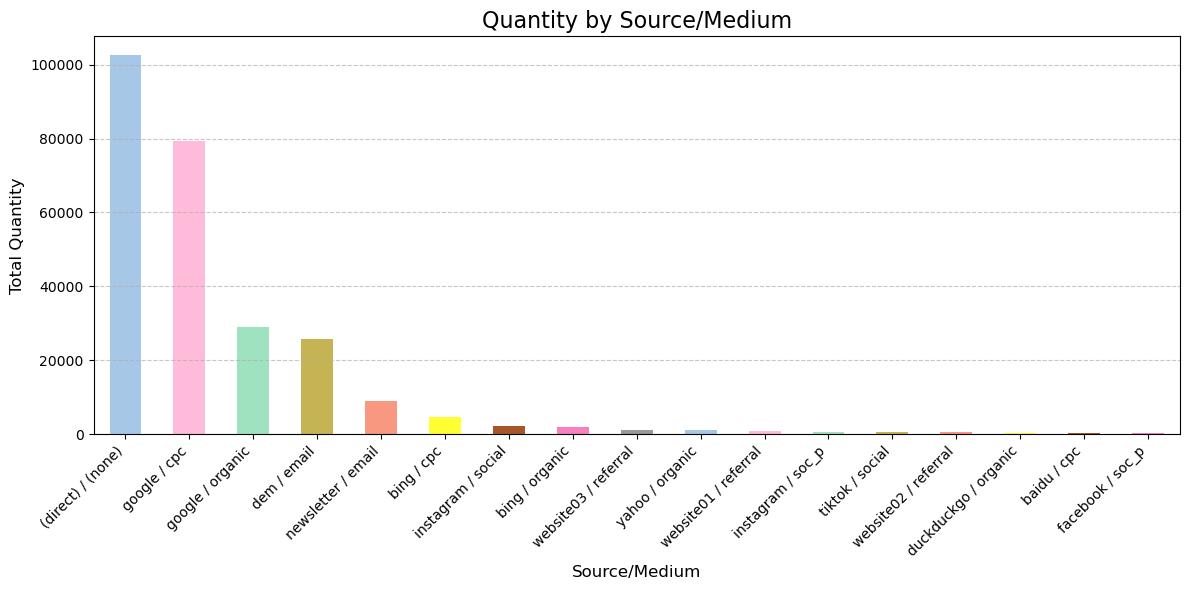

In [24]:
# plot quantity by sourceMedium
quantity_by_source = df_beauty.groupby('sourceMedium')['quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))  #
quantity_by_source.plot(kind='bar', color=my_palette)  

plt.title('Quantity by Source/Medium', fontsize=16)  
plt.xlabel('Source/Medium', fontsize=12) 
plt.ylabel('Total Quantity', fontsize=12) 
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

# Price analysis

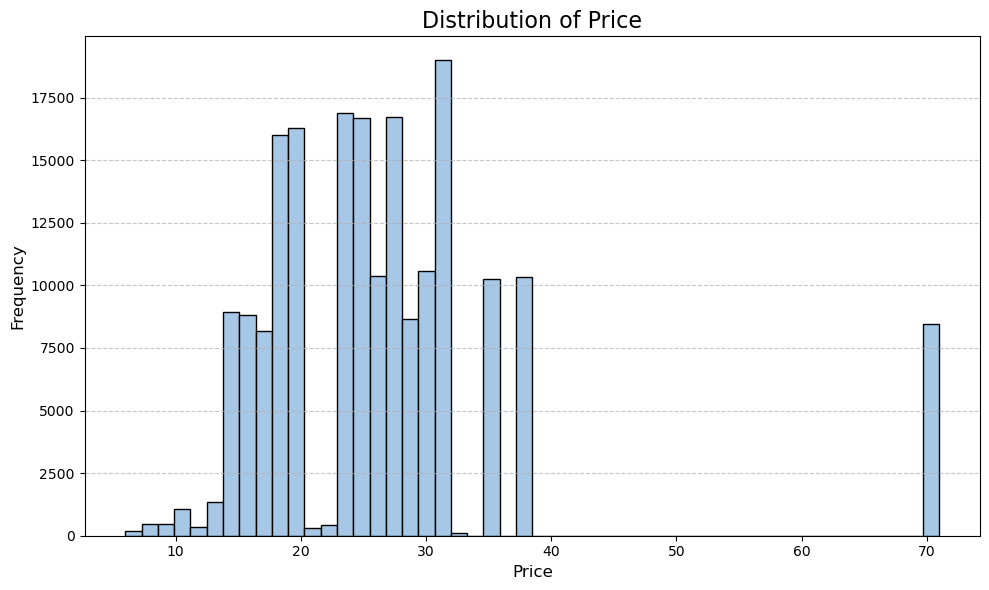

In [25]:
plt.figure(figsize=(10, 6))  
df_beauty['price'].plot(kind='hist', bins=50, edgecolor='black', color=my_palette[0])
plt.title('Distribution of Price', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [26]:

def create_sankey(data, columns, title="Sankey Chart"):
    def generate_colors(n):
        colors = []
        for i in range(n):
            hue = i / n
            rgb = colorsys.hsv_to_rgb(hue, 0.7, 0.9)
            rgba = f'rgba({int(rgb[0]*255)},{int(rgb[1]*255)},{int(rgb[2]*255)},0.8)'
            colors.append(rgba)
        return colors

    flow_data = data.groupby(columns).size().reset_index(name='count')

    unique_cats = []
    for col in columns:
        unique_cats.append(list(flow_data[col].unique()))

    colors_per_column = [generate_colors(len(cats)) for cats in unique_cats]

    all_nodes = []
    node_colors = []
    for cats, colors in zip(unique_cats, colors_per_column):
        all_nodes.extend(cats)
        node_colors.extend(colors)

    node_indices = {node: idx for idx, node in enumerate(all_nodes)}

    source = []
    target = []
    value = []
    paths = []

    for i in range(len(columns)-1):
        source_col = columns[i]
        target_col = columns[i+1]

        for _, row in flow_data.iterrows():
            src = node_indices[row[source_col]]
            tgt = node_indices[row[target_col]]
            source.append(src)
            target.append(tgt)
            value.append(row['count'])
            path = " → ".join([str(row[col]) for col in columns])
            paths.append(path)

    link_colors = []
    for s in source:
        base_color = node_colors[s]
        rgba_values = base_color.replace('rgba(', '').replace(')', '').split(',')
        link_colors.append(f'rgba({rgba_values[0]},{rgba_values[1]},{rgba_values[2]},0.3)')

    hover_text = [f"Path: {path}<br>Value: {v}" for path, v in zip(paths, value)]

    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=all_nodes,
            color=node_colors
        ),
        link=dict(
            source=source,
            target=target,
            value=value,
            color=link_colors,
            customdata=hover_text,
            hovertemplate='%{customdata}<extra></extra>'
        )
    )])

    annotations = []
    for i, col in enumerate(columns):
        x_pos = i / (len(columns) - 1) if len(columns) > 1 else 0.5
        annotations.append(
            dict(
                text=col,
                x=x_pos,
                y=1.05,
                showarrow=False,
                font=dict(size=12)
            )
        )

    fig.update_layout(
        title_text=title,
        font_size=10,
        height=800,
        annotations=annotations
    )

    return fig

# Temporal analysis 
When do users buy?
Which is the age of the customers when they buy?

In [27]:
df_beauty['date'].sort_values()

137775    2021-01-01
170998    2021-01-01
171026    2021-01-01
30779     2021-01-01
127562    2021-01-01
             ...    
52590     2023-10-20
111566    2023-10-20
117217    2023-10-20
70924     2023-10-20
189873    2023-10-20
Name: date, Length: 190811, dtype: object

In [28]:
#convert birthday to datetime
df_beauty['birthday'] = pd.to_datetime(df_beauty['birthday'], format='%d/%m/%Y')

In [29]:
# convert date to datetime
df_beauty['date'] = pd.to_datetime(df_beauty['date'], format='%Y-%m-%d')

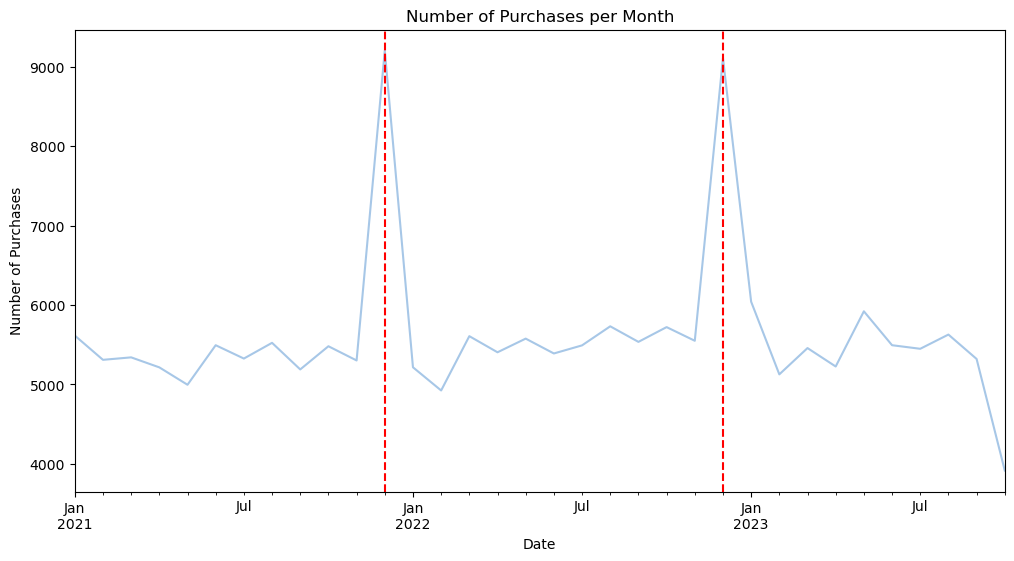

In [30]:
# plot date of purchase as temporal graph per month (avg the days)
df_beauty['month'] = df_beauty['date'].dt.to_period('M')
plt.figure(figsize=(12, 6))
df_beauty['month'].value_counts().sort_index().plot()
# set x ticks to be every month
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases per Month')
# add red dotted lines for december (peak season)
plt.axvline(x=pd.Period('2021-12'), color='red', linestyle='--')
plt.axvline(x=pd.Period('2022-12'), color='red', linestyle='--')

plt.show()

In [31]:
df_beauty['purchase age'] = df_beauty['date'] - df_beauty['birthday'] # age at purchase

In [32]:
df_beauty['purchase age'] = df_beauty['purchase age'].dt.days // 365 # convert to years

In [33]:
df_beauty['purchase age']

0         32
1         33
2         36
3         37
4         35
          ..
190806    39
190807    39
190808    39
190809    41
190810    31
Name: purchase age, Length: 190811, dtype: int64

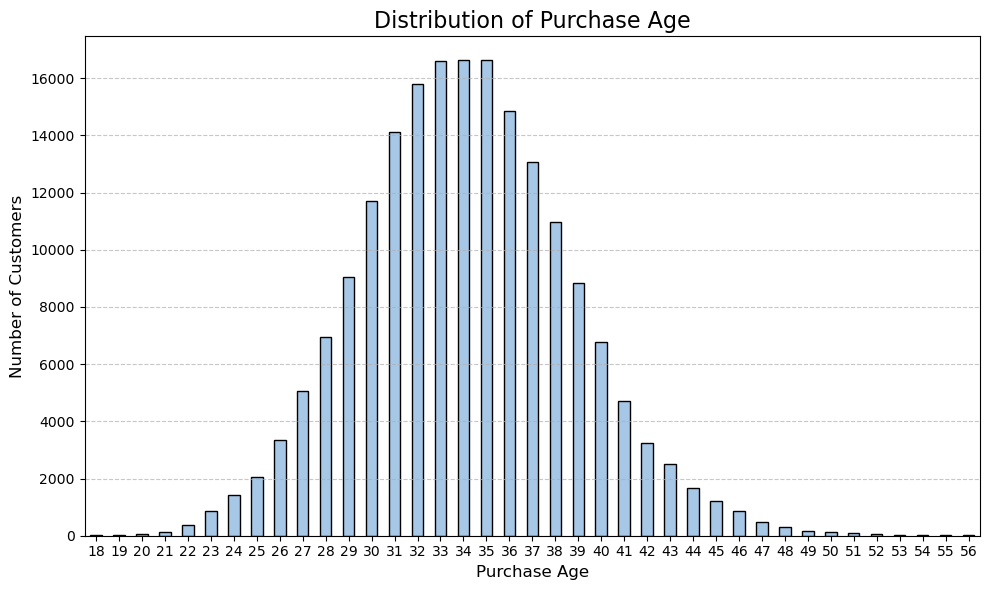

In [34]:
# plot age distribution
age_counts = df_beauty['purchase age'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color=my_palette[0], edgecolor='black')
plt.title('Distribution of Purchase Age', fontsize=16)
plt.xlabel('Purchase Age', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Since the data are synthetic we have a normal distribution of the age of the customers. 

In [35]:
# divide into age categories
df_beauty['age cat'] = pd.cut(df_beauty['purchase age'], bins=[0, 25, 35, 45, 56], labels=['18-25', '26-35', '36-45', '46-56']) 

In [36]:
create_sankey(df_beauty, ['gender', 'age cat', 'main_category', 'sub_category'], title="Ecommerce Beauty Sankey Chart")

In [37]:
create_sankey(df_beauty, ['age cat', 'sourceMedium'], title="Ecommerce Beauty Sankey Chart")

In [38]:
# same info of sankey but with a stacked bar chart
df_grouped = df_beauty.groupby(['age cat', 'main_category']).size().unstack(fill_value=0)
fig = px.bar(df_grouped,
             barmode="stack",
             title="Stacked a Bar Chart: Age vs Main Category")
fig.show()

In [39]:
# column average order value
df_beauty.groupby('userId')['revenue'].mean()


userId
USR00000001    36.485000
USR00000002    35.837000
USR00000003    33.880000
USR00000004    34.129048
USR00000005    27.321111
                 ...    
USR00015979    42.284500
USR00015980    42.650000
USR00015981    45.914286
USR00015982    29.708889
USR00015983    32.098889
Name: revenue, Length: 15910, dtype: float64

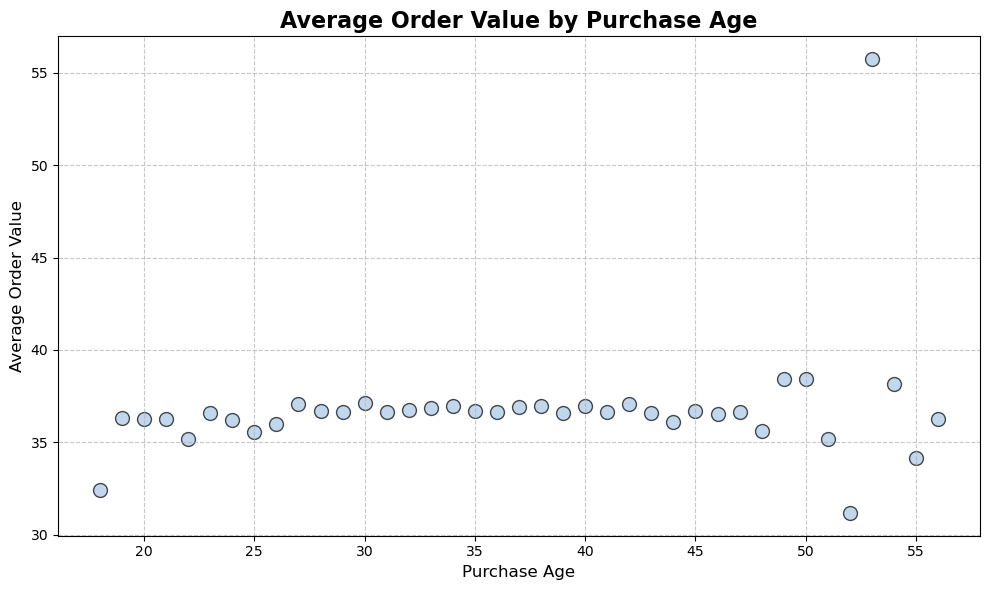

In [40]:
# Calculate average order value per purchase age
df_aov = df_beauty.groupby('purchase age')['revenue'].mean().reset_index()

# Create the scatter plot
plt.figure(figsize=(10, 6))  
plt.scatter(df_aov['purchase age'], df_aov['revenue'], color=my_palette[0], edgecolor='black', s=100, alpha=0.7)

# Customize the plot
plt.title('Average Order Value by Purchase Age', fontsize=16, fontweight='bold')
plt.xlabel('Purchase Age', fontsize=12)
plt.ylabel('Average Order Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  
plt.tight_layout()

plt.show()

Average order value per age is almost uniform.

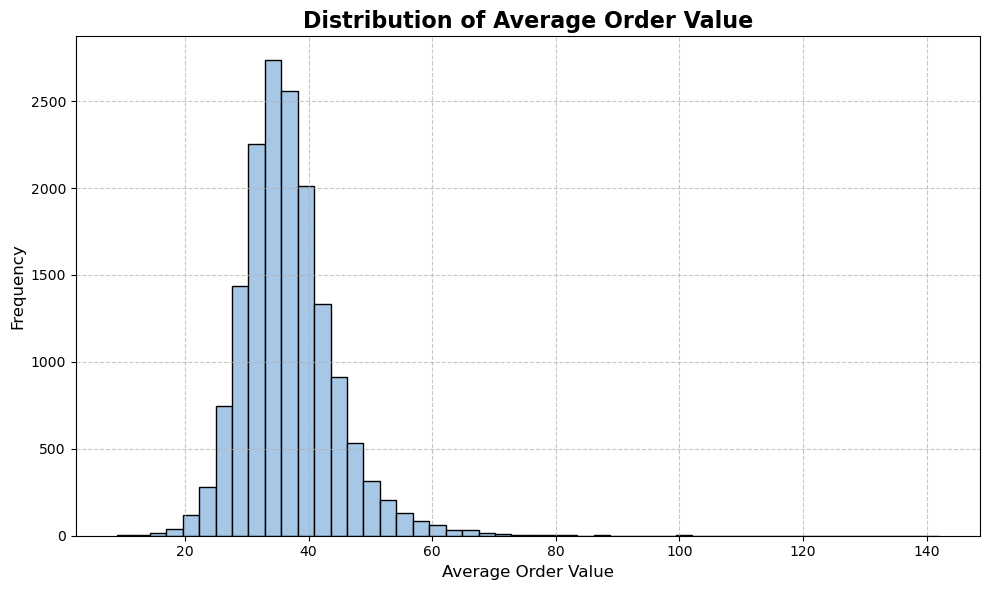

In [41]:
# Calculate average order value per user
avg_order_values = df_beauty.groupby('userId')['revenue'].mean()

plt.figure(figsize=(10, 6)) 
avg_order_values.plot(kind='hist', bins=50, edgecolor='black', color=my_palette[0])
plt.title('Distribution of Average Order Value', fontsize=16, fontweight='bold')
plt.xlabel('Average Order Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7) 
plt.tight_layout()

plt.show()

# Segmentation analysis

In [42]:
# Frequency of purchases for each user
purchase_frequency = df_beauty.groupby('userId')['orderId'].nunique().reset_index()
purchase_frequency.columns = ['userId', 'purchase_frequency']

# Calculate average order value for each user
avg_order_value = df_beauty.groupby('userId')['revenue'].mean().reset_index()
avg_order_value.columns = ['userId', 'avg_order_value']

# Calculate the most common main category for each user
top_category = df_beauty.groupby(['userId', 'main_category']).size().reset_index(name='count')
top_category = top_category.loc[top_category.groupby('userId')['count'].idxmax(), ['userId', 'main_category']]

# Get the most common sub-category for each user
id_info = df_beauty[['userId', 'age cat', 'gender']].drop_duplicates()
id_info = id_info.groupby('userId').agg({'age cat': 'max', 'gender': 'first'}).reset_index()

# Merge all the dataframes  
customer_segments = purchase_frequency.merge(avg_order_value, on='userId') \
                                      .merge(top_category, on='userId') \
                                      .merge(id_info, on='userId')

# Create segments based on purchase frequency
customer_segments['purchase_segment'] = pd.cut(
    customer_segments['purchase_frequency'],
    bins=[0, 1, 5, 10, float('inf')],
    labels=['One-time Buyer', 'Occasional Buyer', 'Frequent Buyer', 'Loyal Customer']
)

# Create segments based on average order value
customer_segments['aov_segment'] = pd.cut(
    customer_segments['avg_order_value'],
    bins=[0, 20, 30, 40, 50, float('inf')],
    labels=['Low Spender', 'Medium Spender', 'Medium High Spender', 'High Spender', 'Very High Spender']
)

# Main category segment based on the most common category if it is one of the top 5 categories
popular_categories = df_beauty['main_category'].value_counts().index[:5]
customer_segments['product_segment'] = customer_segments['main_category'].apply(
    lambda x: x if x in popular_categories else 'Other'
)

customer_segments.head()

,userId,purchase_frequency,avg_order_value,main_category,age cat,gender,purchase_segment,aov_segment,product_segment
0,USR00000001,1,36.485000,Corpo,26-35,F,One-time Buyer,Medium High Spender,Corpo
1,USR00000002,9,35.837000,Corpo,26-35,F,Frequent Buyer,Medium High Spender,Corpo
2,USR00000003,9,33.880000,Skincare,36-45,F,Frequent Buyer,Medium High Spender,Skincare
3,USR00000004,7,34.129048,Corpo,36-45,M,Frequent Buyer,Medium High Spender,Corpo
4,USR00000005,5,27.321111,Skincare,26-35,F,Occasional Buyer,Medium Spender,Skincare


In [43]:
fig = px.bar(customer_segments['purchase_segment'].value_counts(), title="Distribution of Purchase Segments")
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Number of clients"
)
fig.show()

In [44]:
# plot AOV per purchase segment
fig = px.box(customer_segments, x='purchase_segment', y='avg_order_value', title="AOV per Segmento", color='purchase_segment')
fig.show()

In [45]:
create_sankey(customer_segments, ['purchase_segment', 'aov_segment'], title="Customer Behavior Sankey Chart")

In [46]:
df_grouped = customer_segments.groupby(['product_segment', 'purchase_segment']).size().unstack(fill_value=0)
fig = px.bar(df_grouped,
             barmode="stack",
             title="Favorite Category vs Purchase Segment",
             labels={'value': 'Number of clients', 'product_segment': 'Product Category'},
             color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show()

In [47]:
# Same plot but with percentage
df_grouped = df_grouped.div(df_grouped.sum(axis=1), axis=0)
fig = px.bar(df_grouped,
             barmode="stack",
             title="Favorite Category vs Purchase Segment (Percentage)",
             labels={'value': 'Number of Clients', 'product_segment': 'Product Category'},
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.show()